## **Dữ liệu**
---
*Bộ dữ liệu được lấy trên https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset* <br>
Bao gồm các thông tin về khoản nợ và lịch sử chi trả/giao dịch cũng như các biến nhân khẩu học liên quan tới các khách hàng ở Đài Loan từ tháng 4/2005 đến tháng 9/2005<br>



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision= 3)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Test file và input file
df = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')
df0 = pd.read_csv(r'E:\Scorecard prediction\Creditcard.csv')

## **Thống kê mô tả**

In [4]:
# Kiểm tra dữ liệu khuyết thiếu
df0.isnull().sum().to_frame().T

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df0.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,...,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,...,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


Các bill nhập vào có một số loại có giá trị âm, đây có thể là vấn đề khi nhập liệu, cần sửa lại

In [42]:
for i in list(df.columns[-13:-2]):
    df[i] = abs(df[i])

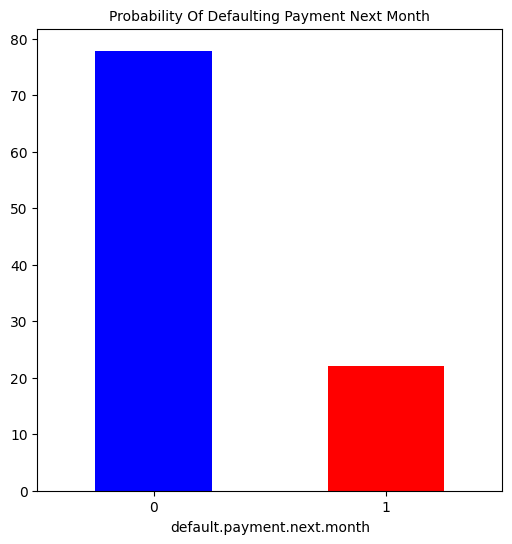

Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. 
Số lượng khách được dự đoán sẽ trả chiếm khoảng 77.88% trong khi số lượng sẽ nợ chỉ 22.12%.


In [5]:
# Kiểm tra dữ liệu đầu ra

default_count = (df0['default.payment.next.month'].value_counts(normalize=True)*100)
default_count.plot.bar(figsize=(6,6), color =['b','r'])
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=10)
plt.show()
pass

print("Có hiện tượng mất cân bằng dữ liệu khi dữ liệu đầu ra giữa 2 nhóm có sự chênh lệch đáng kể. \nSố lượng khách được dự đoán sẽ trả chiếm khoảng {}% trong khi số lượng sẽ nợ chỉ {}%."
      .format(round(default_count[0],3), round(default_count[1],3)))

Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. 
Vì vậy khi đưa dữ liệu vào cần Scale để mô hình có kết quả tốt nhất.


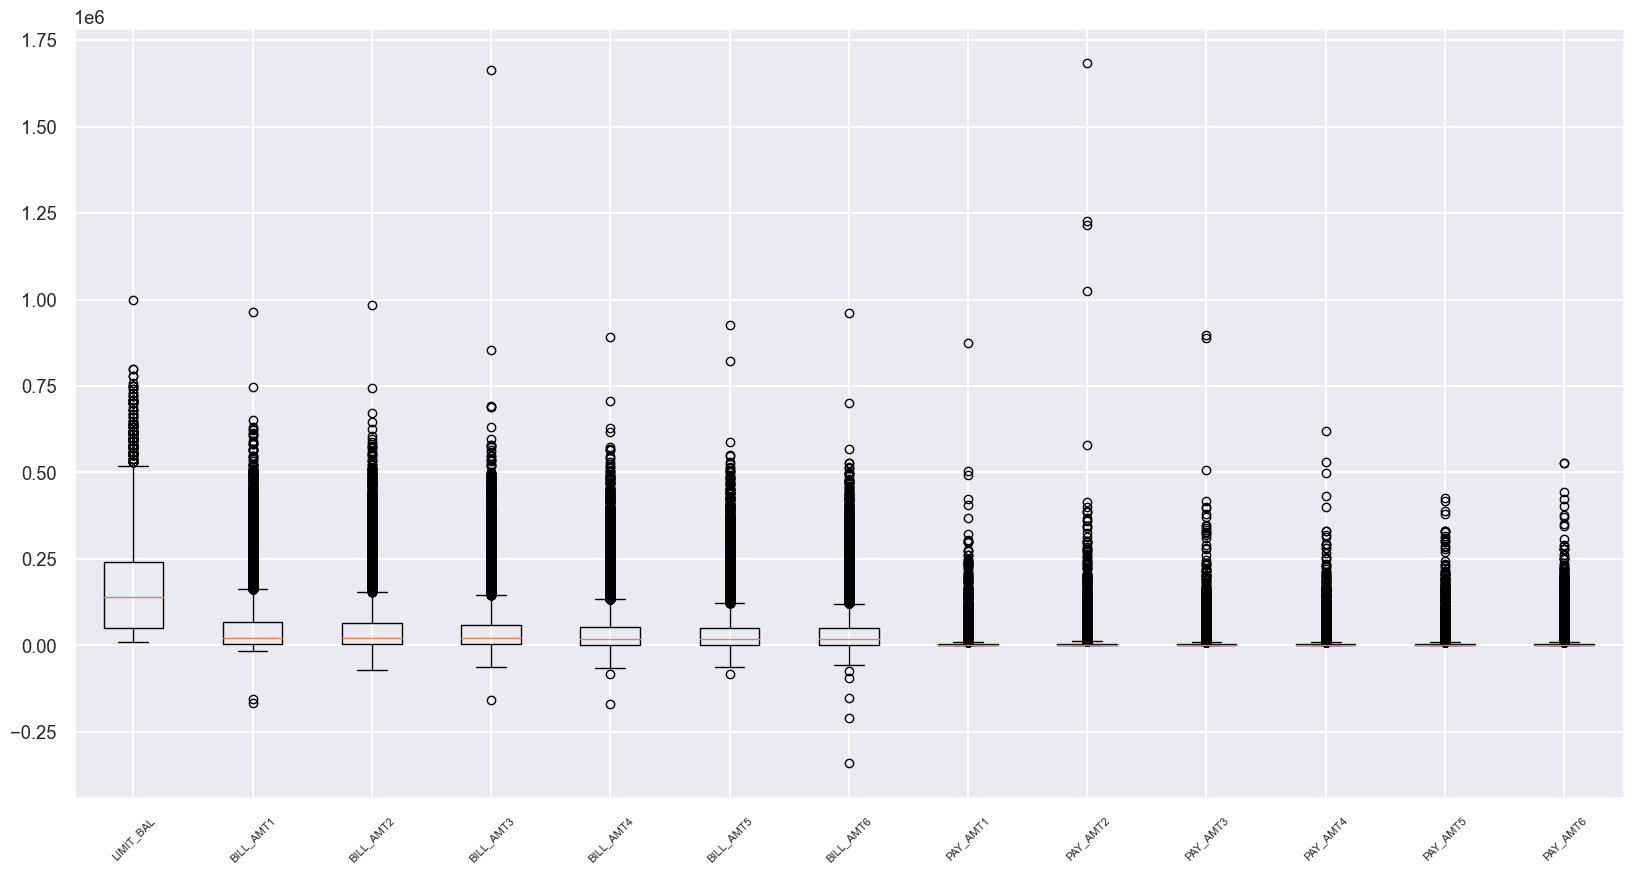

In [43]:
# Kiểm tra outlier
print("Dữ liệu về tiền có số lượng outliers cao và khoảng cách lớn. \nVì vậy khi đưa dữ liệu vào cần Scale để mô hình có kết quả tốt nhất.")

numer = df0[['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
fig, ax1 = plt.subplots(figsize =(20, 10))
ax1
ax1.set_xticklabels(numer, rotation=45, fontsize=8) #đặt tên - kích thước cho các biến trục hoàng
plt.boxplot(numer)
plt.show()

### Default or not
---
* Nhìn chung thì nhóm có học vấn (2) đại học và tốt nghiệp cấp 3 (1) có xu hướng trả nợ chễ hạn nhiều, đặc biệt là nhóm 2
* Không có quá nhiều sự khác biệt về tình trạng kết hôn giữa các nhóm có số lượng lớn

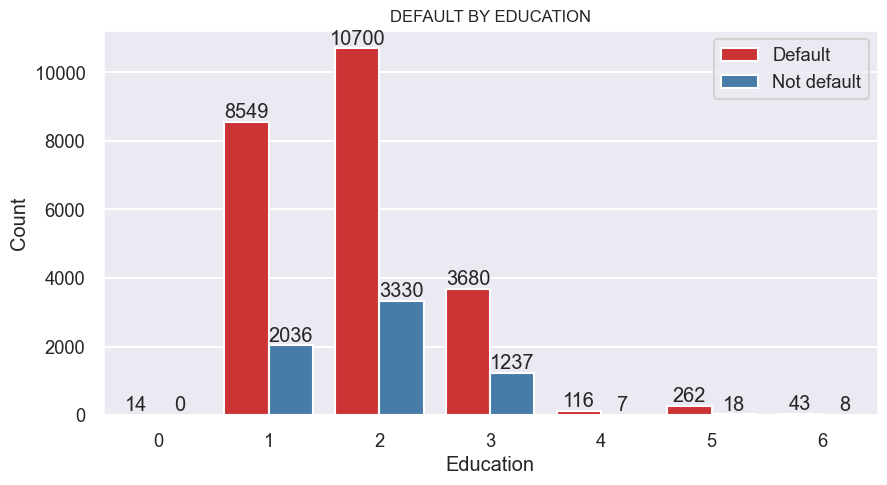

In [44]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=df0, palette = 'Set1')
for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='Education', ylabel='Count')
plt.title("DEFAULT BY EDUCATION", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

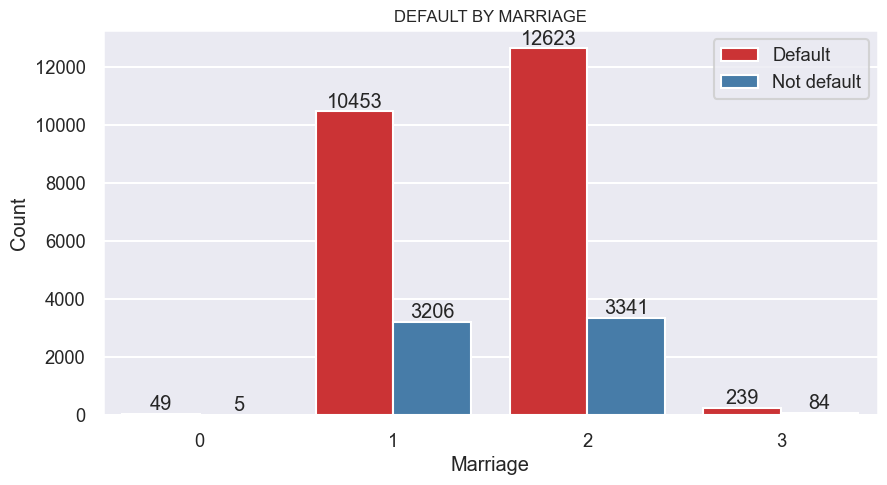

In [45]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=df0, palette = 'Set1')
for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='Marriage', ylabel='Count')
plt.title("DEFAULT BY MARRIAGE", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

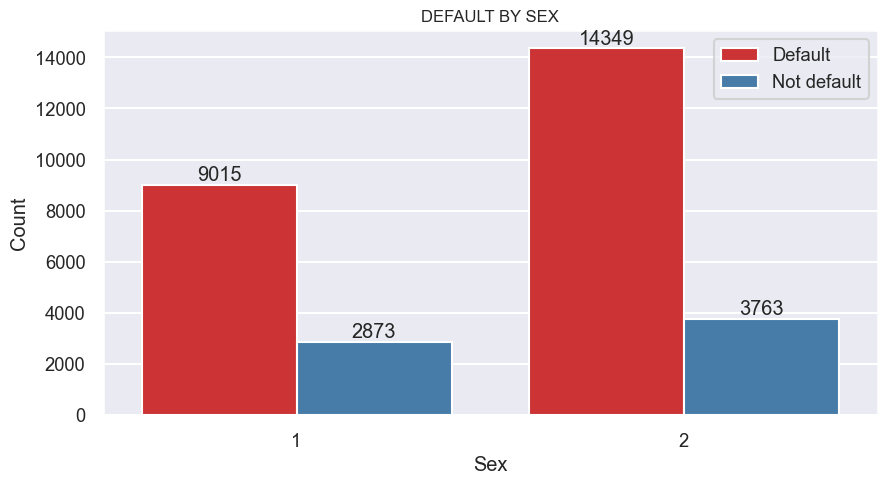

In [46]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x="SEX", hue="default.payment.next.month", data=df0, palette = 'Set1')
for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='Sex', ylabel='Count')
plt.title("DEFAULT BY SEX", fontdict = {'fontsize':12})
LAB = {'Not default','Default'}
ax.legend(labels=LAB)
pass

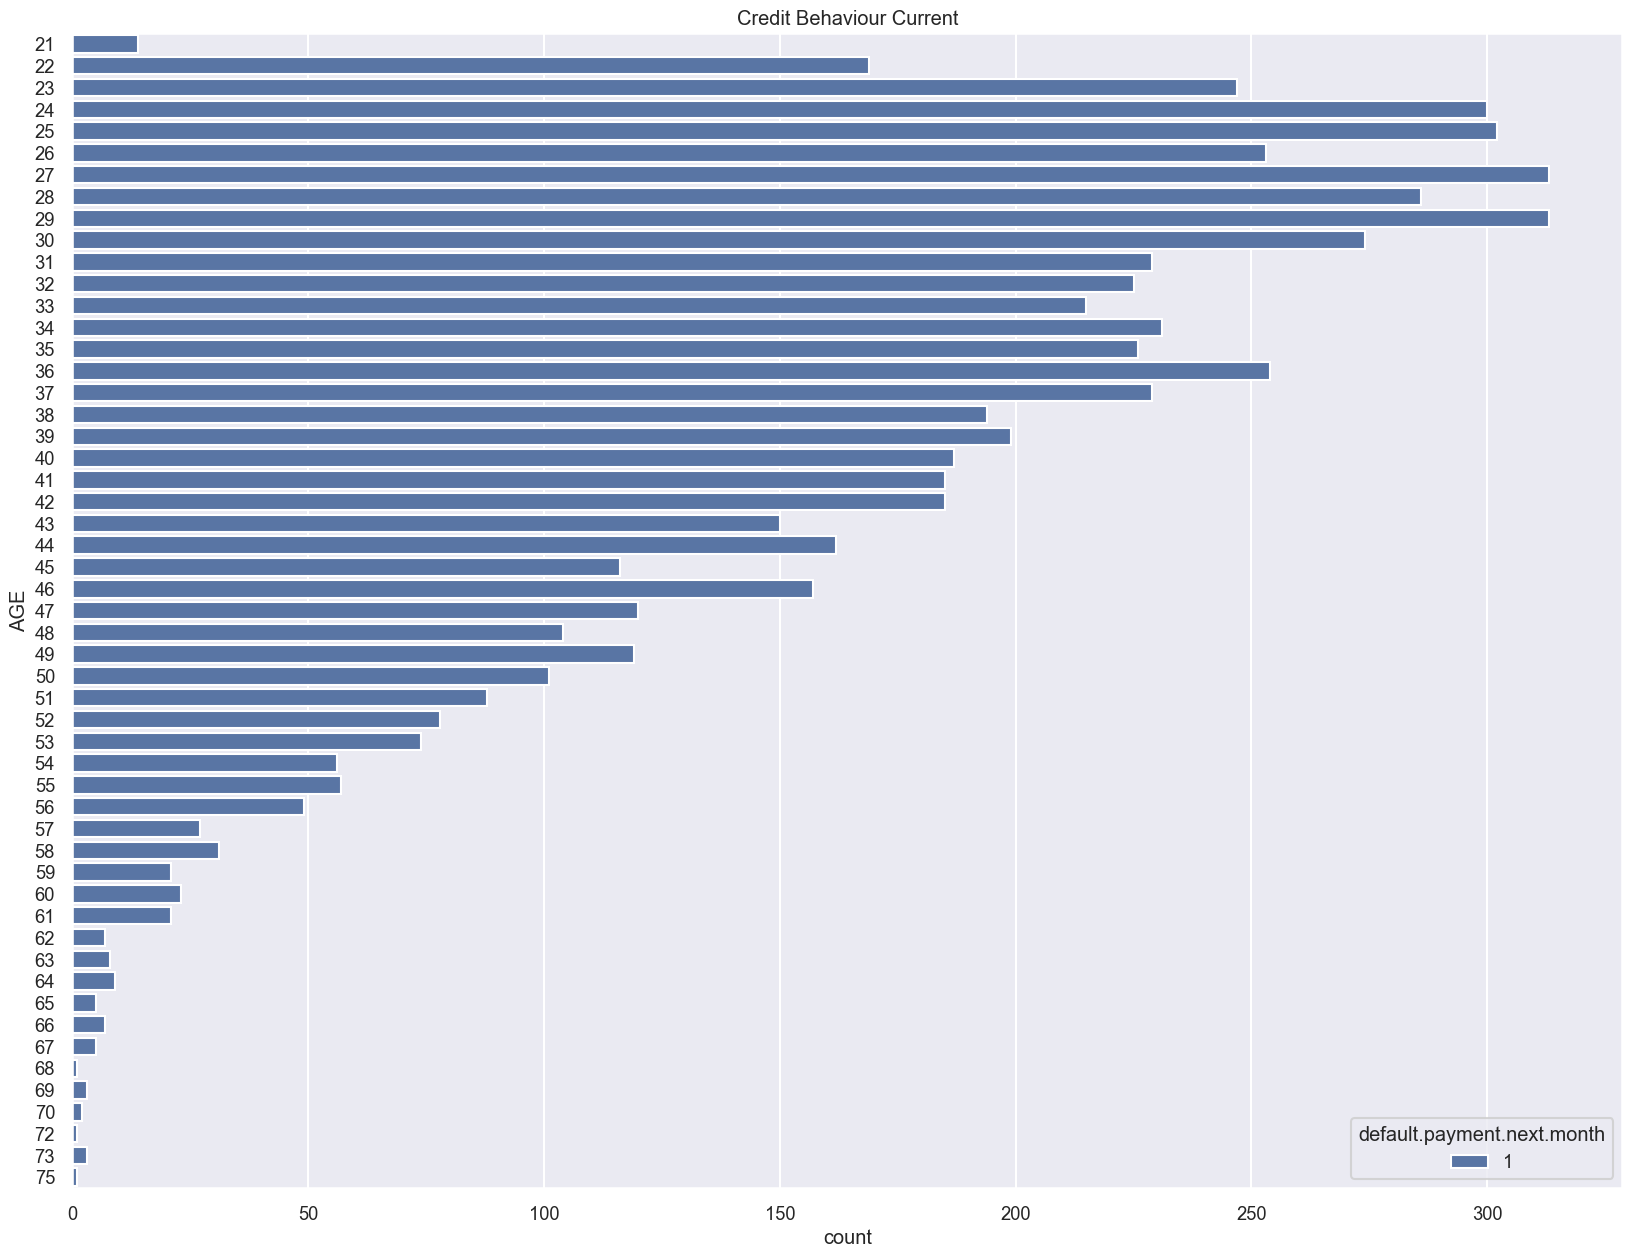

In [64]:
plt.figure(figsize= (20, 15))
pay0 = sns.countplot(y= "AGE",hue='default.payment.next.month', data=df0[df0['default.payment.next.month'] == 1])
pay0.set_title('Credit Behaviour Current')
plt.show()

Nhóm tuổi 23- 30 có xu hướng nợ xấu

Ở đây có thể thấy phân phối khách hàng nữ mà nợ xấu có độ lệch cao hơn nam. Nhóm có tỉ lệ nợ tốt là nữ cũng có xu hướng phân phối lệch trái và giống với nhóm của cùng giới tính 


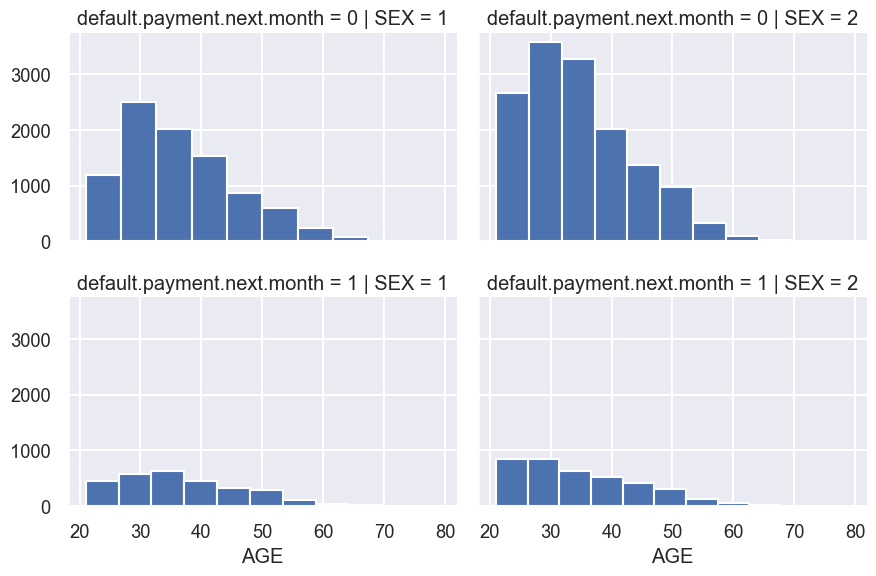

In [49]:
print("Ở đây có thể thấy phân phối khách hàng nữ mà nợ xấu có độ lệch cao hơn nam. Nhóm có tỉ lệ nợ tốt là nữ cũng có xu hướng phân phối lệch trái và giống với nhóm của cùng giới tính ")
sns.FacetGrid(df0, row='default.payment.next.month',col='SEX', aspect = 1.5, height = 3).map(plt.hist,'AGE')
pass

In [17]:
# Lấy các continuous data
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] != 'object':
        num_col.append(x)

num_col.remove('ID')
num_col.remove('SEX')
num_col.remove('EDUCATION')
num_col.remove('MARRIAGE')
num_col.remove('default.payment.next.month')

Số biến định lượng:  20


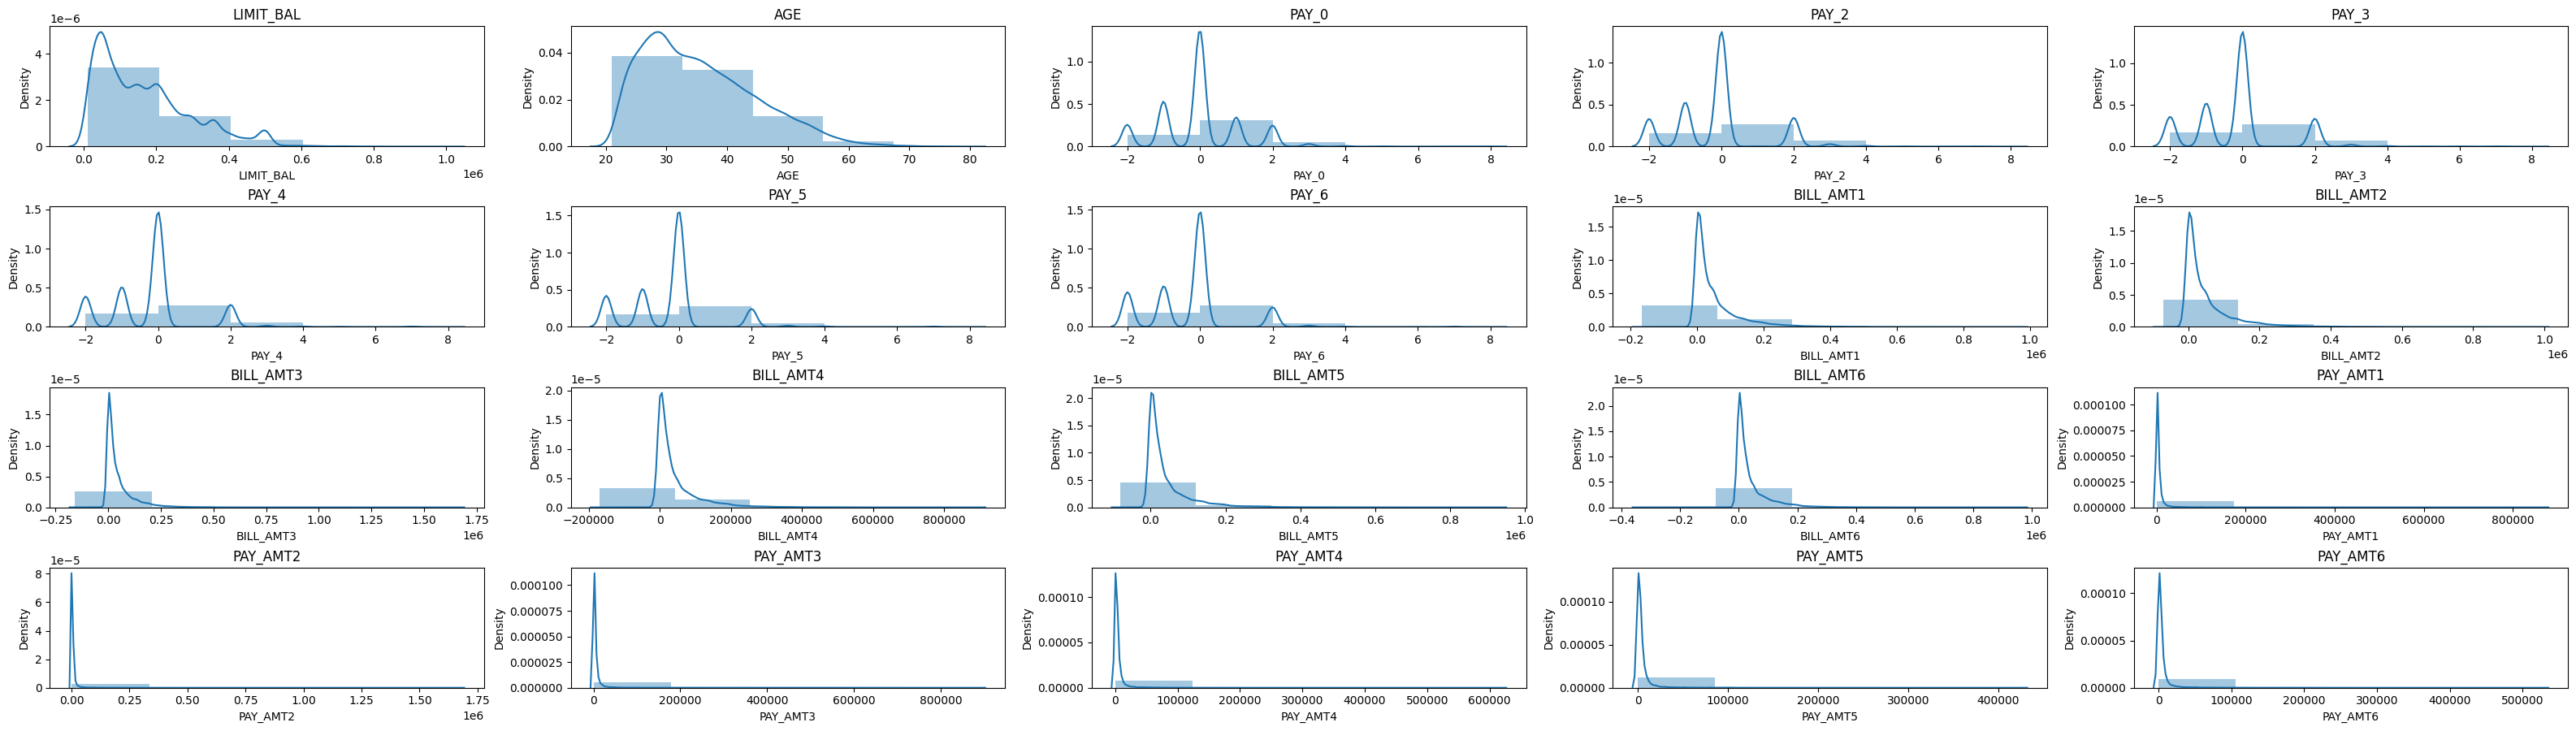

In [27]:
# Mô tả biến định lượng

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def distribution_numeric(df, numeric_cols, row= 9, col=5, figsize=(40, 25), bins = 5):
    print('Số biến định lượng: ', len(numeric_cols))
    #assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

distribution_numeric(df, num_col)

Các biến có dạng PAY có skew rất nhọn và lệch sang 1 phía. Vì vậy có thể skew lại để mô hình train có hiệu quả hơn

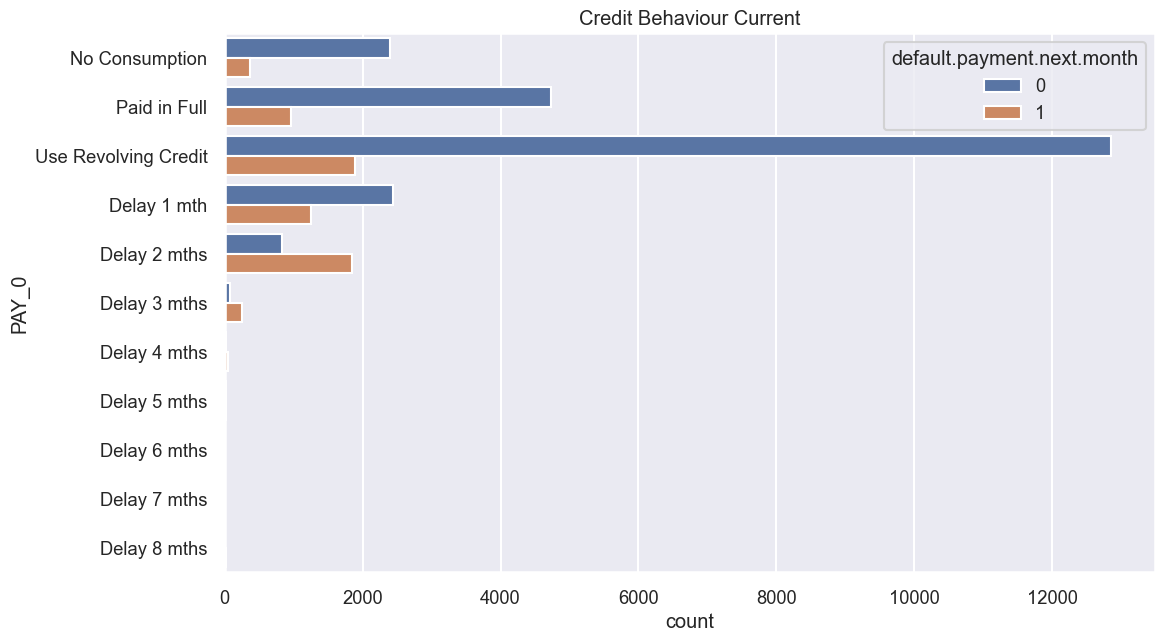

In [50]:
plt.figure(figsize = (12,7))
pay0 = sns.countplot(y= "PAY_0",hue='default.payment.next.month', data=df0)
pay0.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths' ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay0.set_title('Credit Behaviour Current')
plt.show()

- Khách có nợ phải trả đã trễ `2 tháng` có xu hướng sẽ tiếp tục `nợ xấu` vào tháng kế với tỉ lệ nợ cao
- Có những khách đã `fully paid` nhưng vẫn bị đáh dấu là `nợ xấu` vào tháng kế
- Có một số khách hàng có `bill chi trả` lớn hơn `hạn mức tín dụng` nên cần loại ra khỏi mô hình.

In [53]:
df0[['ID','LIMIT_BAL', 'BILL_AMT1']][df0['BILL_AMT1'] > df0['LIMIT_BAL']].shape[0]

2115

## **TIỀN XỬ LÝ DỮ LIỆU**

In [65]:
df = df[df['BILL_AMT1'] <= df['LIMIT_BAL']]

Thay thế các dữ liệu đã đề cập phía trên và loại bỏ biến đầu ra khỏi đầu vào chính

In [66]:
df = df.rename(columns={"default.payment.next.month": "default","PAY_0": "PAY_1"})
df['EDUCATION'].replace([5,6],4)
df['MARRIAGE'].replace(0,3)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 27885, dtype: int64

In [82]:
#Thay thế các giá trị lỗi
df['PAY_1'] =df['PAY_1'].replace(-2,-1)
df['PAY_2'] =df['PAY_2'].replace(-2,-1)
df['PAY_3'] =df['PAY_3'].replace(-2,-1)
df['PAY_4'] =df['PAY_4'].replace(-2,-1)
df['PAY_5'] =df['PAY_5'].replace(-2,-1)
df['PAY_6'] =df['PAY_6'].replace(-2,-1)

In [67]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.000,2,2,1,24,2,2,-1,-1,...,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000,1
1,2,120000.000,2,2,2,26,-1,2,0,0,...,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000,1
2,3,90000.000,2,2,2,34,0,0,0,0,...,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000,0
3,4,50000.000,2,2,1,37,0,0,0,0,...,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,...,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000,0


In [68]:
# lấy giá trị dương các khoản trả/bill
for i in list(df.columns[-13:-2]):
    df[i] = df[i].replace(0.000, 1)
    df[i] = abs(df[i])

In [69]:
#Loại bỏ output khỏi đầu vào chính
df1 =df.drop(columns= ['default','ID'])

In [70]:
# Do phân phối dữ liệu bị lệch nên cần phải skew lại
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df1[x], ax=ax[0,0])
    sns.distplot(np.log(df1[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df1[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df1[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df1[x].skew().round(2))
    print(np.log(df1[x]).skew().round(2))
    print(np.sqrt(df1[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df1[x])[0]).skew().round(2))

In [71]:
for i in list(df1.columns[-12:-1]):
    df1[i] = stats.boxcox(df1[i])[0]

df1['LIMIT_BAL'] = stats.boxcox(df1['LIMIT_BAL'])[0]
df1['AGE'] =stats.boxcox(df1['AGE'])[0]

In [72]:
#Chuyển các biến str thành dạng categories
df1 = pd.get_dummies(data=df1, columns=['SEX', 'MARRIAGE', 'EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], dtype = float)
df2 = df['default']

In [73]:
df1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,59.282,1.631,23.191,21.627,14.280,0.000,0.000,0.000,0.000,13.409,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,102.813,1.648,21.000,18.504,20.693,21.583,21.177,19.880,0.000,14.826,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2,94.189,1.701,38.438,31.731,31.235,31.282,30.356,28.860,17.713,16.492,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,78.686,1.716,43.116,42.834,42.688,36.888,35.500,33.429,19.072,17.802,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,78.686,1.785,28.396,25.276,39.557,34.304,32.199,30.273,19.072,35.597,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## **Giảm chiều dữ liệu**
---
*Ở đây sẽ dùng phương pháp giảm chiều dữ liệu Random forest dựa trên lượng thông tin nhận về càng lớn càng tốt. Và dùng làm đầu vào cho Neural network ở phía sau* 

Quá trình cũng sử dụng Smote do các features có độ lớn khác nhau và Scale để chuẩn hóa dữ liệu đầu vào loại bỏ các outliers.

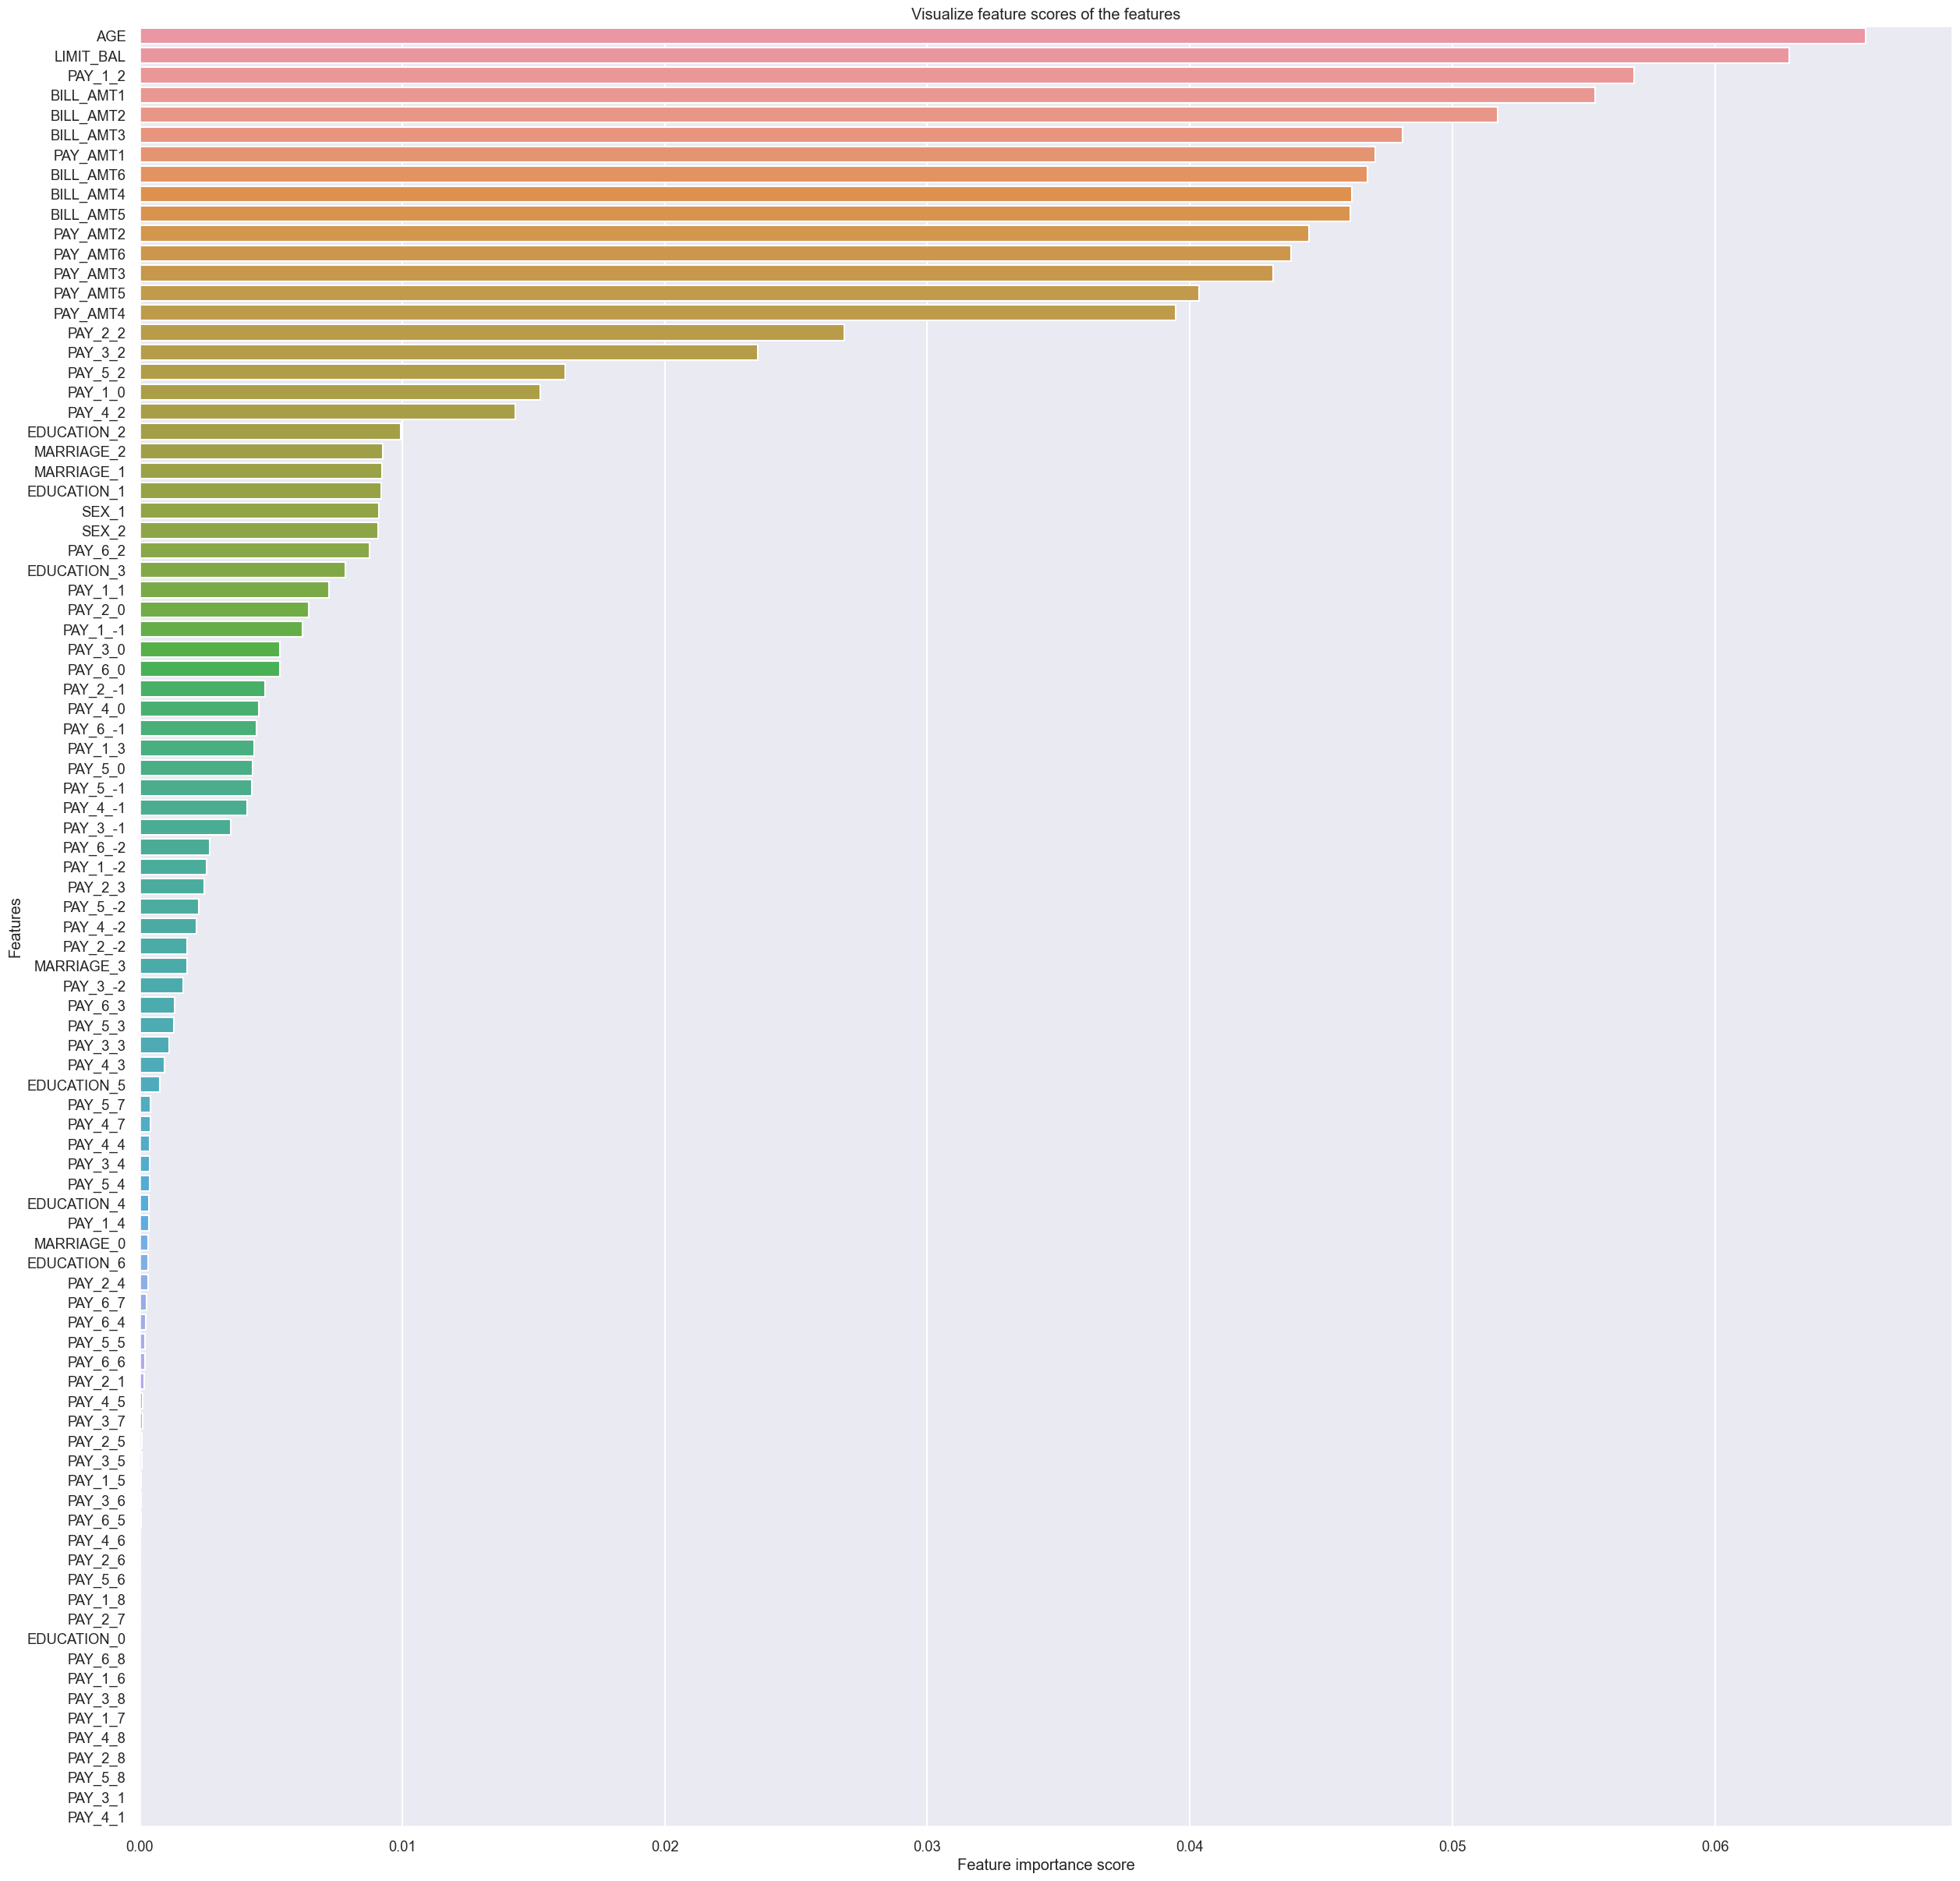

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(df1, df2)

feature_scores = pd.Series(clf.feature_importances_, index=df1.columns).sort_values(ascending=False)
feature_scores

f, ax = plt.subplots(figsize=(30, 30))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [83]:
# Lựa chọn các features có importance lớn hơn mức trung vị để giữ được các biến định tính có ý nghĩa trong mô hình

feature_scores2 = feature_scores[feature_scores >= feature_scores.median()]
feature_scores2

AGE           0.066
LIMIT_BAL     0.063
PAY_1_2       0.057
BILL_AMT1     0.055
BILL_AMT2     0.052
BILL_AMT3     0.048
PAY_AMT1      0.047
BILL_AMT6     0.047
BILL_AMT4     0.046
BILL_AMT5     0.046
PAY_AMT2      0.045
PAY_AMT6      0.044
PAY_AMT3      0.043
PAY_AMT5      0.040
PAY_AMT4      0.039
PAY_2_2       0.027
PAY_3_2       0.024
PAY_5_2       0.016
PAY_1_0       0.015
PAY_4_2       0.014
EDUCATION_2   0.010
MARRIAGE_2    0.009
MARRIAGE_1    0.009
EDUCATION_1   0.009
SEX_1         0.009
SEX_2         0.009
PAY_6_2       0.009
EDUCATION_3   0.008
PAY_1_1       0.007
PAY_2_0       0.006
PAY_1_-1      0.006
PAY_3_0       0.005
PAY_6_0       0.005
PAY_2_-1      0.005
PAY_4_0       0.005
PAY_6_-1      0.004
PAY_1_3       0.004
PAY_5_0       0.004
PAY_5_-1      0.004
PAY_4_-1      0.004
PAY_3_-1      0.003
PAY_6_-2      0.003
PAY_1_-2      0.003
PAY_2_3       0.002
PAY_5_-2      0.002
PAY_4_-2      0.002
dtype: float64

In [76]:
df3 = df1.drop(columns = feature_scores[feature_scores < feature_scores.median()].to_frame().T.iloc[:,])
df3

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_4_0,PAY_4_2,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2
0,59.282,1.631,23.191,21.627,14.280,0.000,0.000,0.000,0.000,13.409,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
1,102.813,1.648,21.000,18.504,20.693,21.583,21.177,19.880,0.000,14.826,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
2,94.189,1.701,38.438,31.731,31.235,31.282,30.356,28.860,17.713,16.492,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
3,78.686,1.716,43.116,42.834,42.688,36.888,35.500,33.429,19.072,17.802,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
4,78.686,1.785,28.396,25.276,39.557,34.304,32.199,30.273,19.072,35.597,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,123.557,1.725,59.979,59.372,59.849,48.229,36.135,29.043,27.680,30.984,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
29996,110.023,1.742,18.533,18.795,22.187,27.877,23.455,0.000,18.645,20.477,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
29997,67.227,1.716,22.634,22.076,20.846,34.279,32.756,30.355,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
29998,90.864,1.734,18.418,48.075,47.342,42.776,28.712,37.449,48.375,20.307,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000


In [77]:
feature_scores2 = np.array([feature_scores2])
feature_scores2.shape

(1, 46)

In [78]:
#Trước khi đưa dữ liệu vào cần SMOTE để tránh những cột có giá trị quá lớn trong khi các cột biến phân loại có giá trị quá nhỏ

from imblearn.over_sampling import SMOTE

# Upsampling with SMOTE algorithm
smote = SMOTE(random_state= None ,k_neighbors= 5)

X_smote, y_smote = smote.fit_resample(df3, df2)

print(f'''Shape of X before SMOTE: {df3.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts()


Shape of X before SMOTE: (27885, 46)
Shape of X after SMOTE: (43770, 46)

Balance of positive and negative classes (%):


default
1    21885
0    21885
Name: count, dtype: int64

In [79]:
#Scale dữ liệu
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_smote_scaled=mms.fit_transform(X_smote)
x_smote_scaled

array([[0.079, 0.132, 0.265, ..., 0.   , 0.   , 0.   ],
       [0.374, 0.207, 0.24 , ..., 0.   , 0.   , 1.   ],
       [0.316, 0.439, 0.44 , ..., 0.   , 1.   , 0.   ],
       ...,
       [0.345, 0.68 , 0.572, ..., 0.   , 0.181, 0.819],
       [0.404, 0.317, 0.565, ..., 0.   , 1.   , 0.   ],
       [0.423, 0.179, 0.   , ..., 0.   , 0.   , 0.   ]])

## **Dự đoán bằng NEURAL NETWORK**


In [80]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote_scaled,y_smote,test_size=0.25,random_state=30)
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))

Variables in Train Set : 32827 & Test Set : 10943


In [81]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model
pass

In [87]:
#Nhập các thông số đầu vào cho mạng neuron 
model.add(tf.keras.layers.Dense(units=46,activation='relu', use_bias = True)) #input layer với 43 đầu vào
model.add(tf.keras.layers.Dense(units=94,activation='relu', use_bias = True)) #hidden layer với số node = n1*2 +2 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                   #output layer

In [88]:
#Hàm loss và optimizer
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

In [89]:
#Hàm loss và optimizer
from keras import models, layers, optimizers, regularizers
learning_rate = 0.01
model.compile(optimizer=optimizers.Adam(lr = learning_rate),loss= 'binary_crossentropy',metrics=['accuracy'])

In [90]:
training = model.fit(x_train,y_train,batch_size=32,epochs= 50)
#https://www.kaggle.com/code/timniven/feedforward-neural-network-tutorial -------- link vẽ biểu đồ

Epoch 1/50
1026/1026 [==============================] - 3s 1ms/step - loss: 0.5183 - accuracy: 0.7517
Epoch 2/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8010
Epoch 3/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.4056 - accuracy: 0.8188
Epoch 4/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3906 - accuracy: 0.8284
Epoch 5/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3780 - accuracy: 0.8357
Epoch 6/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3679 - accuracy: 0.8405
Epoch 7/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3637 - accuracy: 0.8427
Epoch 8/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3574 - accuracy: 0.8459
Epoch 9/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8469
Epoch 10/50
1026/1026 [==============================] - 1s 1ms/step - loss: 0.349

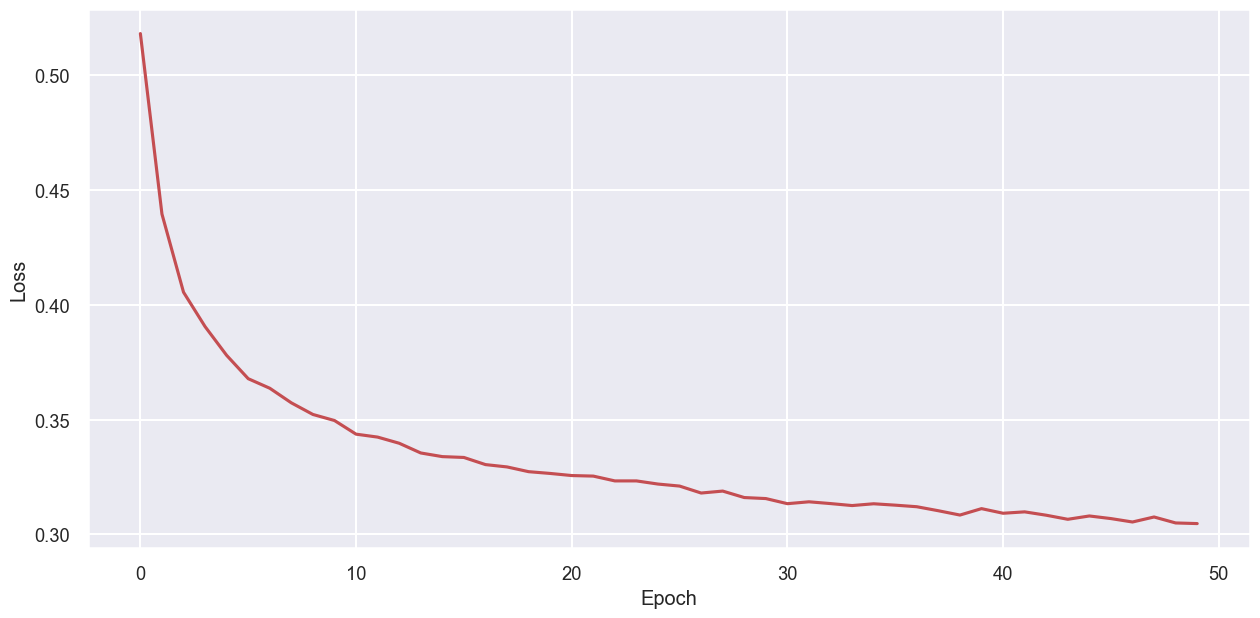

In [91]:
plt.plot(training.history['loss'],'r')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
pass

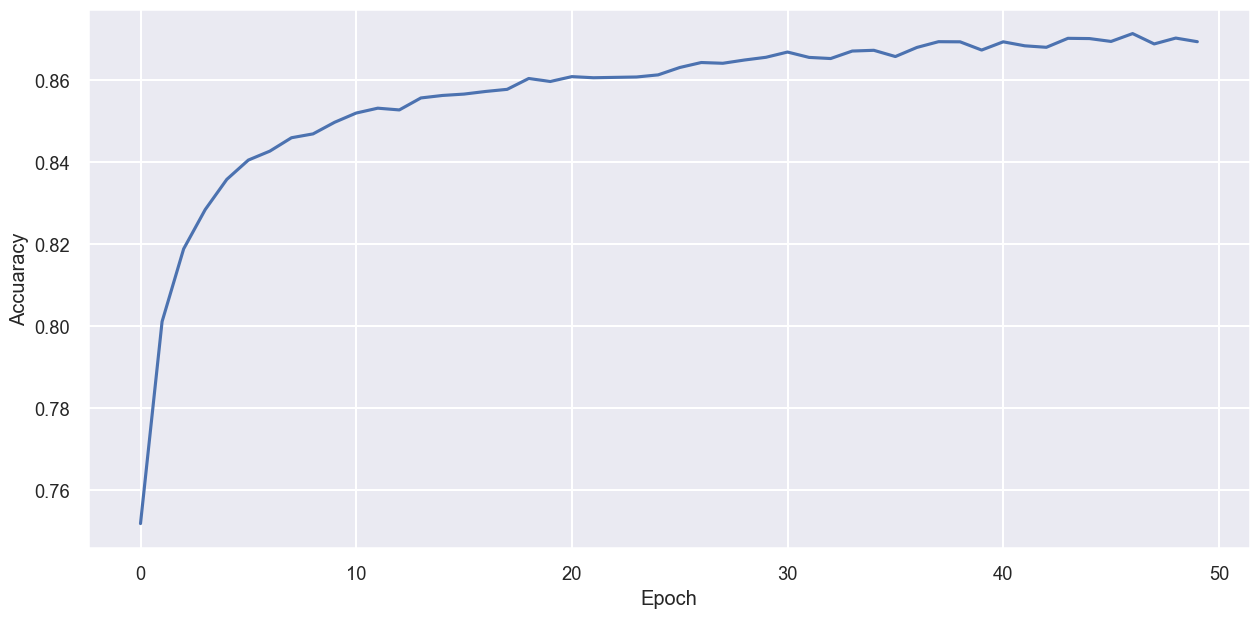

In [92]:
plt.plot(training.history['accuracy'], 'b')
plt.xlabel("Epoch")
plt.ylabel("Accuaracy")
plt.show()
pass

In [93]:
#https://www.kaggle.com/code/thejas2002/notebook6ca73be3d5#4:-TRAIN-AND-EVALUATE-AN-XGBOOST-CLASSIFIER - link vẽ biểu đồ 2
#https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#17.-Classification-metrices- --- link vẽ biểu đồ 3

342/342 [==============================] - 0s 919us/step


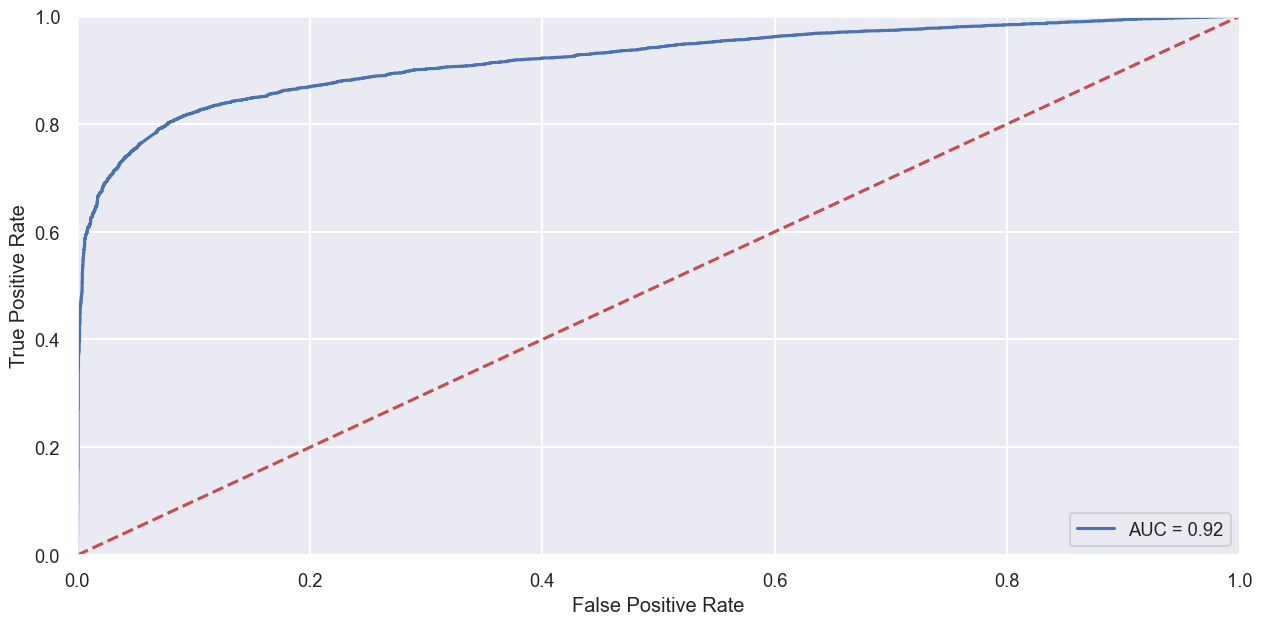

In [94]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(x_test))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc =  'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
pass

In [95]:
# Độ chính xác của các tập dữ liệu
train_score = model.evaluate(x_train, y_train, verbose =2)
test_score = model.evaluate(x_test, y_test,verbose =2)
val_score = model.evaluate(x_smote_scaled, y_smote, verbose =2)
pass

1026/1026 - 1s - loss: 0.3127 - accuracy: 0.8699 - 1s/epoch - 1ms/step
342/342 - 0s - loss: 0.3629 - accuracy: 0.8593 - 313ms/epoch - 915us/step
1368/1368 - 1s - loss: 0.3253 - accuracy: 0.8673 - 1s/epoch - 880us/step


## **KẾT QUẢ**

In [96]:
print('Độ chính xác của model trên tập training là {}%'.format(round(train_score[1],3)*100))
print('Độ chính xác của model trên tập test là {}%'.format(round(test_score[1],4)*100))
print('ROC_AUC là {}%'.format(round(roc_auc,4)*100))

pass

Độ chính xác của model trên tập training là 87.0%
Độ chính xác của model trên tập test là 85.92999999999999%
ROC_AUC là 91.9%
